# Gaussian Mixture Models (GMM) — From Scratch + Comparison with k-means + Digits Generation

This notebook combines:
- **MML-book GMM tutorial & solution** — theoretical EM derivation and from-scratch implementation
- **Python Data Science Handbook** (Jake VanderPlas) — visual exploration, k-means vs GMM comparison, and generative modeling

We will:
1. Implement GMM using EM algorithm **from scratch**
2. Fit it to a **non-spherical 2D dataset** for better visualization
3. Compare to **k-means**
4. Apply GMMs for **digit clustering and generation**


## Learning goals
After this tutorial you should be able to:
- Understand the EM algorithm for Gaussian Mixture Models
- Implement E-step and M-step manually
- Visualize how GMM generalizes k-means
- Use GMM to model digits as a generative model


In [1]:
# PACKAGE: DO NOT EDIT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

plt.rcParams['figure.figsize'] = (6, 4)


## 1. Synthetic 2D Dataset with Non-Spherical Clusters

We'll create a toy dataset and apply a random linear transformation to make clusters **elongated and rotated**.  
This helps visualize the difference between **k-means** (spherical clusters) and **GMM** (elliptical clusters).


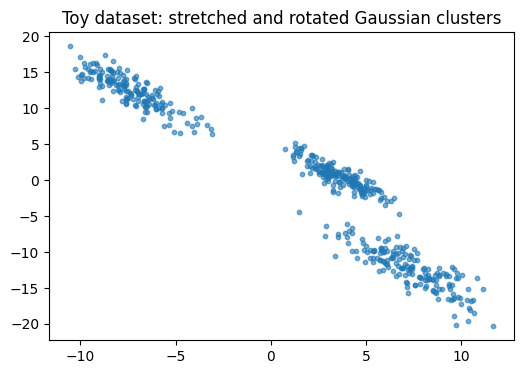

In [ ]:
# Create isotropic blobs
rng = np.random.default_rng(13)
X, y_true = make_blobs(
    n_samples=500,
    centers=[(-2, 0), (0, 4), (4, 0)],
    cluster_std=[0.8, 0.9, 1.0],
    random_state=0
)

# Stretch and rotate using random matrix
X_stretched = np.dot(X, rng.standard_normal((2, 2)))

plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=10, alpha=0.6)
plt.title("Toy dataset: stretched and rotated Gaussian clusters")
plt.show()


In [ ]:
def init_gmm_params(X, n_components, random_state=0):
    """Initialize means, covariances, and weights."""
    # TODO: initialize GMM parameters (means from data, identity covariances, uniform weights)
    raise NotImplementedError


In [ ]:
def log_gaussian_pdf(X, mean, cov):
    """Compute log N(x|mean,cov) for each x."""
    # TODO: use np.linalg.slogdet or np.linalg.cholesky for stability
    raise NotImplementedError


In [ ]:
def e_step(X, pi, means, covs):
    """E-step: compute responsibilities gamma_{nk}."""
    # TODO: compute weighted log-probabilities, normalize using log-sum-exp
    raise NotImplementedError


In [ ]:
def m_step(X, gamma, reg_covar=1e-6):
    """M-step: update pi, means, and covariances."""
    # TODO: implement mean/cov updates
    raise NotImplementedError


In [ ]:
def gmm_em(X, n_components, max_iter=100, tol=1e-4, random_state=0):
    """Run EM algorithm for GMM."""
    # TODO: combine steps into EM loop (initialize → alternate E and M → stop on convergence)
    raise NotImplementedError


In [ ]:
# Fit your GMM from scratch on the stretched dataset
K = 3
pi_hat, means_hat, covs_hat, ll = gmm_em(X_stretched, n_components=K, random_state=0)

plt.plot(ll)
plt.title("EM log-likelihood convergence")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()


## 2. Compare GMM vs k-means

Use your GMM implementation and sklearn's k-means to see how they differ on the **stretched data**.


In [ ]:
# TODO: fit k-means (n_clusters=3) and plot vs GMM responsibilities
raise NotImplementedError


## 3. GMM on Digits Dataset

Now let's move from 2D toy data to a higher-dimensional example.

We'll use the `digits` dataset to:
- fit GMMs to 10 components
- visualize learned component means as prototypical digits
- sample new synthetic digits


In [ ]:
digits = load_digits()
X_digits = digits.data
images = digits.images
print("Digits shape:", X_digits.shape)


In [ ]:
# TODO: Fit GaussianMixture from sklearn and visualize its means and generated samples
raise NotImplementedError


## 4. Reflection

In your own words:
- What is the main difference between k-means and GMM?
- Why does GMM handle elongated clusters better?
- How does GMM act as a **generative** model?
